# Gold price prediction project 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### data collection and cleaning

In [2]:
gold_data=pd.read_csv("gld_price_prediction_data.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<AxesSubplot:>

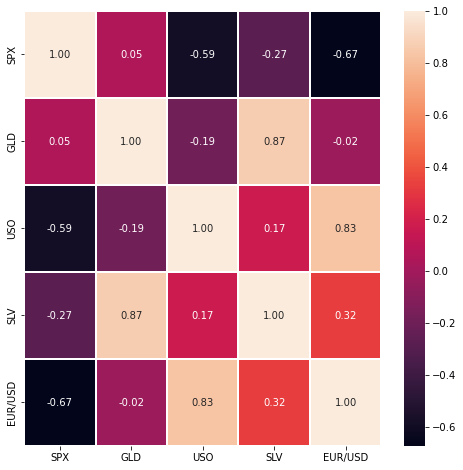

In [9]:
corr = gold_data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)

In [10]:
print (corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\ss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

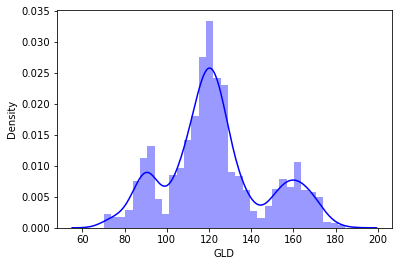

In [11]:
sns.distplot(gold_data['GLD'],color="b")

### Train and test split data

In [20]:
x_trail = gold_data[['SPX','USO','SLV','EUR/USD']]
X = x_trail.iloc[:, :].values
y = gold_data.iloc[:, 2].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=2) 

In [22]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train) 

RandomForestRegressor()

In [23]:
prediction=model.predict(X_test)
prediction

array([168.72689931,  82.02989993, 116.09590056, 127.38100086,
       120.61210173, 154.45729844, 150.0354977 , 126.26010002,
       118.01509925, 125.99850049, 116.59660094, 172.10500075,
       141.58669932, 167.82369811, 115.09550005, 117.97630078,
       138.37620345, 170.49880175, 160.31740359, 156.6184003 ,
       155.27310003, 125.32140017, 175.14709975, 157.0819034 ,
       125.0733003 ,  93.93389944,  77.13960016, 120.27759961,
       119.29590022, 167.41250078,  88.16010009, 125.44080154,
        91.30870108, 117.76810002, 121.09579879, 136.32550055,
       115.42820104, 114.98210093, 147.63259994, 107.07660115,
       104.67900208,  87.17559786, 126.45030041, 117.70989958,
       154.03669894, 119.98649982, 108.40130093, 108.34659853,
        93.19339967, 127.12469762,  75.06250002, 113.71529921,
       120.90069999, 111.12689901, 118.79469885, 120.73439923,
       159.39810023, 168.93870104, 146.89139675,  86.07899865,
        94.16350026,  86.79399855,  90.65700036, 118.99

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.r2_score(y_test, prediction)) 

Mean Absolute Error: 0.9891204784869191


In [25]:
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9982722688061619
0.9891204784869191


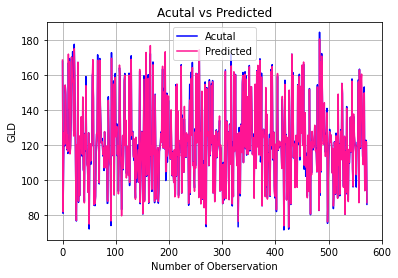

In [26]:
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(prediction, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()